In [64]:
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [65]:
df = pd.read_csv('C:/Users/wogys/Desktop/fake_or_real/input/fake_or_real_news.csv')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [67]:
df.shape

(6335, 4)

In [68]:
df.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [69]:
# Count the number of REAL and FAKE values
Counter(df['label'])

Counter({'FAKE': 3164, 'REAL': 3171})

<AxesSubplot:xlabel='label', ylabel='count'>

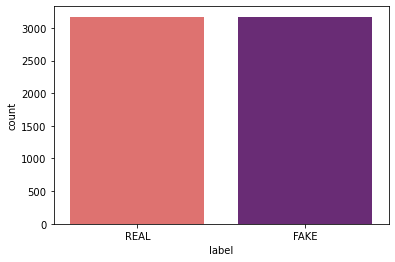

In [70]:
sns.countplot(data=df, x='label', order=df['label'].value_counts().index, palette = "magma_r")

In [71]:
#real vs fake
fig = px.pie(df,names='label',title='Proportion of Real vs. Fake News', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [72]:
# Get the labels
labels = df.label
labels.head(10)

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
5    FAKE
6    FAKE
7    REAL
8    REAL
9    REAL
Name: label, dtype: object

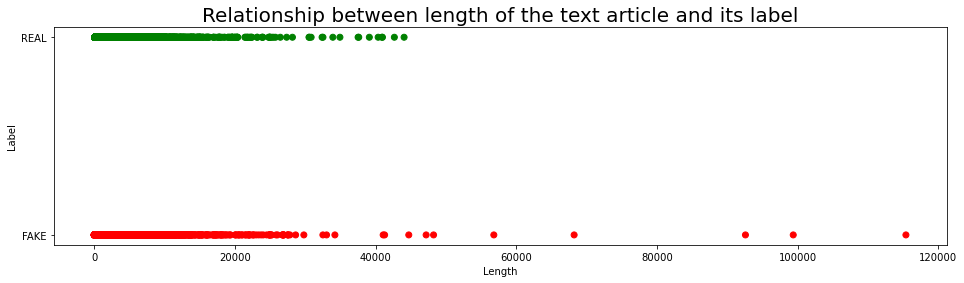

In [73]:
# Set up the plot
plt.figure(figsize=(16,4))
plt.title('Relationship between length of the text article and its label',fontsize=20)

# Extract the text and label columns
texts = df['text']
labels = df['label']

# Extract the length of the text column
lengths = texts.apply(lambda x: len(x))

# Map each label to a color
colors = labels.apply(lambda x: 'green' if x == 'REAL' else 'red')

# Create a scatter plot
plt.scatter(lengths, labels, c=colors)

# Label the axes
plt.xlabel('Length')
plt.ylabel('Label')

# Show the plot
plt.show()

In [74]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [75]:
print(x_train.shape)
print(x_test.shape)

(5068,)
(1267,)


In [76]:
print(y_train.shape)
print(y_test.shape)

(5068,)
(1267,)


In [77]:
#Data Preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [78]:
# Preprocess the data
def preprocess(text):
    # Lowercase the text
    text = text.lower()
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # Stem the tokens
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    
    # Rejoin the stemmed tokens into a single string
    preprocessed_text = ' '.join(stemmed_tokens)
    
    return preprocessed_text

# Apply the preprocessing function to the text data
df['preprocessed_text'] = df['text'].apply(preprocess)

In [79]:
# Apply the preprocessing function to the text data
x_train_preprocessed = x_train.apply(preprocess)
x_test_preprocessed = x_test.apply(preprocess)

In [80]:
df.head(10)

,Unnamed: 0,title,text,label,preprocessed_text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,"daniel greenfield , shillman journal fellow fr..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,googl pinterest digg linkedin reddit stumbleup...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,u.s. secretari state john f. kerri said monday...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,"— kayde king ( @ kaydeek ) novemb 9 , 2016 les..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,'s primari day new york front-runn hillari cli...
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE,"’ immigr , grandpar . 50 year ago , arriv new ..."
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE,"share bayle luciani ( left ) , screenshot bayl..."
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL,czech stockbrok save 650 jewish children nazi ...
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL,hillari clinton donald trump made inaccur clai...
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL,iranian negoti reportedli made last-ditch push...


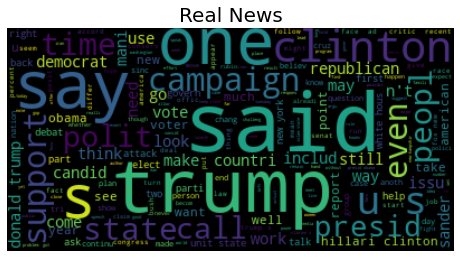

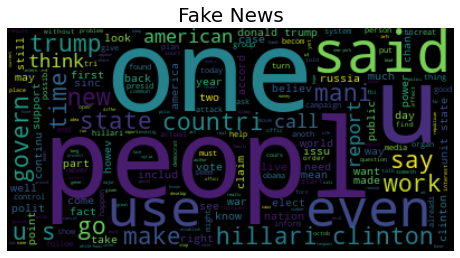

In [81]:
# Creating word cloud for real and fake preprocessed data
from wordcloud import WordCloud

# Extract the preprocessed text and label columns from the dataset
texts = df['preprocessed_text']
labels = df['label']

# Create a string containing the preprocessed text data for "real" news articles
real_text = ' '.join([text for text, label in zip(texts, labels) if label == 'REAL'])

# Create a word cloud object for "real" news articles
real_wordcloud = WordCloud().generate(real_text)

# Create a string containing the preprocessed text data for "fake" news articles
fake_text = ' '.join([text for text, label in zip(texts, labels) if label == 'FAKE'])

# Create a word cloud object for "fake" news articles
fake_wordcloud = WordCloud().generate(fake_text)

# Display the word cloud for "real" news articles
plt.figure(figsize=(8,6))
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Real News',fontsize=20)
plt.show()

# Display the word cloud for "fake" news articles
plt.figure(figsize=(8,6))
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Fake News',fontsize=20)
plt.show()

In [82]:
# Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

In [83]:
# Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train_preprocessed) 
tfidf_test=tfidf_vectorizer.transform(x_test_preprocessed)

In [84]:
print(tfidf_test.shape)
print(tfidf_train.shape)

(1267, 45463)
(5068, 45463)


In [85]:
# Initialize a PassiveAggressiveClassifier
model1 = PassiveAggressiveClassifier(max_iter=50)
model1.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [86]:
# Predict on the test set and calculate accuracy
y_pred1 = model1.predict(tfidf_test)
score1 = accuracy_score(y_test,y_pred1)
print(f'Accuracy: {round(score1, 3)}')

Accuracy: 0.932


In [87]:
# Initialize a LogisticRegression
model2 = LogisticRegression(max_iter=50)
model2.fit(tfidf_train,y_train)

LogisticRegression(max_iter=50)

In [88]:
# Predict on the test set and calculate accuracy
y_pred2 = model2.predict(tfidf_test)
score2 = accuracy_score(y_test,y_pred2)
print(f'Accuracy: {round(score2, 3)}')

Accuracy: 0.918


In [89]:
# Initialize DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(tfidf_train,y_train)

DecisionTreeClassifier()

In [90]:
# Predict on the test set and calculate accuracy
y_pred3 = model3.predict(tfidf_test)
score3 = accuracy_score(y_test,y_pred3)
print(f'Accuracy: {round(score3, 5)}')

Accuracy: 0.809


In [91]:
# Initialize DecisionTreeClassifier
model4 = RandomForestClassifier()
model4.fit(tfidf_train,y_train)

RandomForestClassifier()

In [92]:
# Predict on the test set and calculate accuracy
y_pred4 = model4.predict(tfidf_test)
score4 = accuracy_score(y_test,y_pred4)
print(f'Accuracy: {round(score4, 5)}')

Accuracy: 0.91239


Text(0.5, 1.0, 'Fake news')

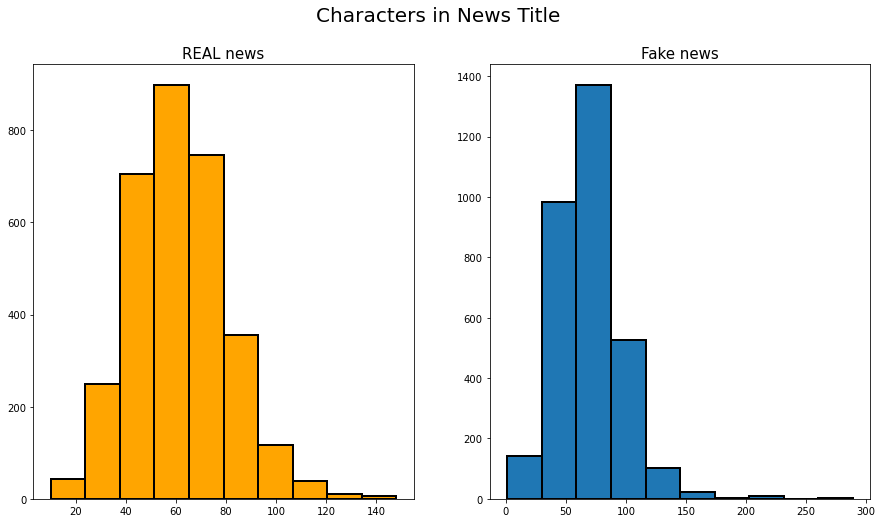

In [93]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
fig.suptitle('Characters in News Title',fontsize=20)
df_len=df[df['label']=='REAL']['title'].str.len()
ax1.hist(df_len,color='orange',linewidth=2,edgecolor='black')
ax1.set_title('REAL news',fontsize=15)
df_len=df[df['label']=='FAKE']['title'].str.len()
ax2.hist(df_len,linewidth=2,edgecolor='black')
ax2.set_title('Fake news',fontsize=15)

Text(0.5, 1.0, 'Fake news')

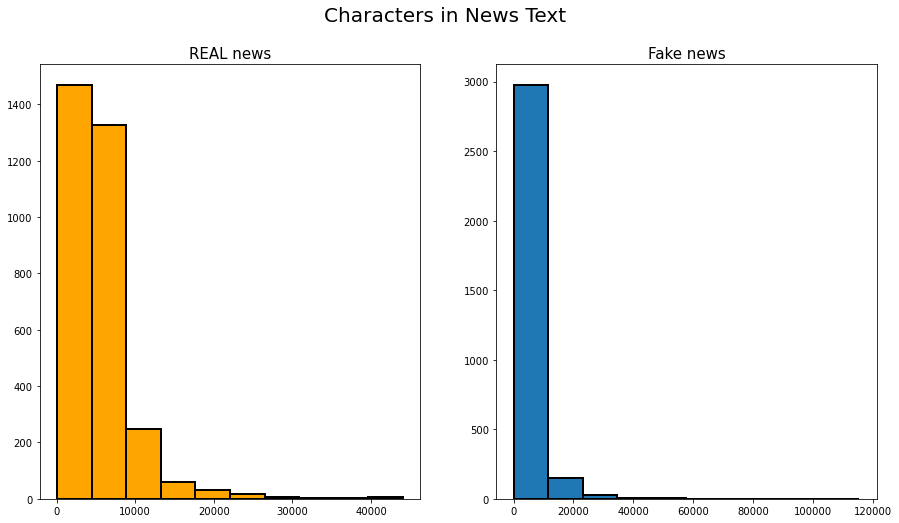

In [105]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
fig.suptitle('Characters in News Text',fontsize=20)
df_len=df[df['label']=='REAL']['text'].str.len()
ax1.hist(df_len,color='orange',linewidth=2,edgecolor='black')
ax1.set_title('REAL news',fontsize=15)
df_len=df[df['label']=='FAKE']['text'].str.len()
ax2.hist(df_len,linewidth=2,edgecolor='black')
ax2.set_title('Fake news',fontsize=15)

In [94]:
labels={'PassiveAggressiveClassifier':score1,'LogisticRegression':score2,'DecisionTreeClassifier':score3,'RandomForestClassifier':score4}

<BarContainer object of 4 artists>

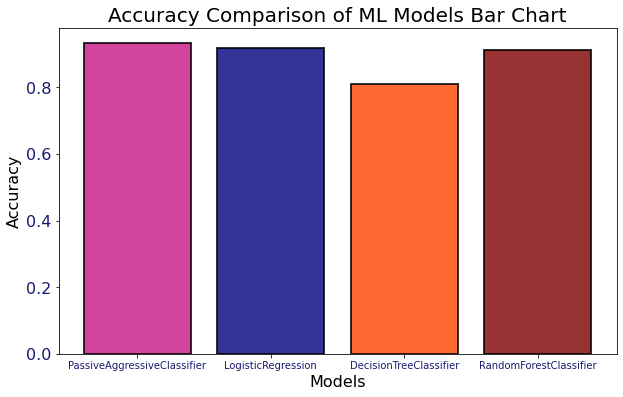

In [95]:
plt.figure(figsize=(10,6))
plt.title('Accuracy Comparison of ML Models Bar Chart',fontsize=20)
colors=['mediumvioletred','navy', 'orangered','maroon']
plt.xticks(fontsize=10,color='midnightblue')
plt.yticks(fontsize=16,color='midnightblue')
plt.ylabel('Accuracy',fontsize=16)
plt.xlabel('Models',fontsize=16)
plt.bar(labels.keys(),labels.values(),edgecolor='black',color=colors, linewidth=2,alpha=0.8)

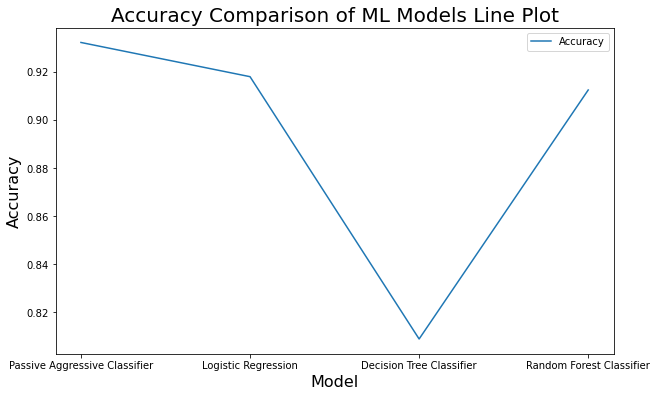

In [96]:
# Set up the plot
plt.figure(figsize=(10,6))
plt.title('Accuracy Comparison of ML Models Line Plot',fontsize=20)

# Extract the model accuracies
accuracies = [score1, score2, score3, score4]

# Extract the names of the model
model_names = ['Passive Aggressive Classifier', 'Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier']

# Plot the accuracy values
plt.plot(model_names, accuracies)

# Add a legend and label the axes
plt.legend(['Accuracy'])
plt.xlabel('Model', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)

# Show the plot
plt.show()

In [97]:
# Build confusion matrix for PassiveAggressiveClassifier
cm1 = confusion_matrix(y_test,y_pred1, labels=['FAKE','REAL']) 
cm1

array([[583,  45],
       [ 41, 598]], dtype=int64)

Confusion Matrix for PassiveAggressiveClassifier


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

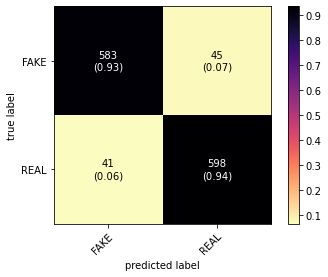

In [98]:
print("\033[1m"+'Confusion Matrix for PassiveAggressiveClassifier'+ "\033[0m")
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'], cmap=plt.cm.magma_r)

In [99]:
# Build confusion matrix for LogisticRegression
cm2 = confusion_matrix(y_test,y_pred2, labels=['FAKE','REAL']) 
cm2

array([[585,  43],
       [ 61, 578]], dtype=int64)

Confusion Matrix for LogisticRegression


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

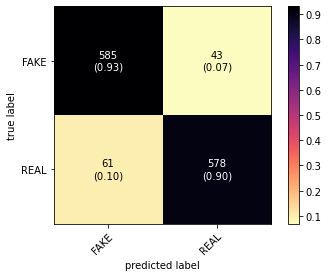

In [100]:
print("\033[1m"+'Confusion Matrix for LogisticRegression'+ "\033[0m")
plot_confusion_matrix(conf_mat=cm2,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'], cmap=plt.cm.magma_r)

In [101]:
# Build confusion matrix for DecisionTreeClassifier
cm3 = confusion_matrix(y_test,y_pred3, labels=['FAKE','REAL']) 
cm3

array([[500, 128],
       [114, 525]], dtype=int64)

Confusion Matrix for DecisionTreeClassifier


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

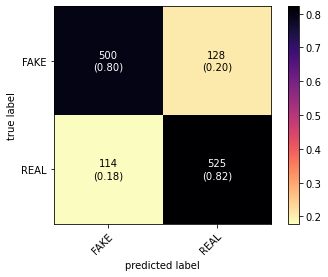

In [102]:
print("\033[1m"+'Confusion Matrix for DecisionTreeClassifier'+ "\033[0m")
plot_confusion_matrix(conf_mat=cm3,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'], cmap=plt.cm.magma_r)

In [103]:
# Build confusion matrix for RandomForestClassifier
cm4 = confusion_matrix(y_test,y_pred4, labels=['FAKE','REAL']) 
cm4

array([[572,  56],
       [ 55, 584]], dtype=int64)

Confusion Matrix for RandomForestClassifier


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

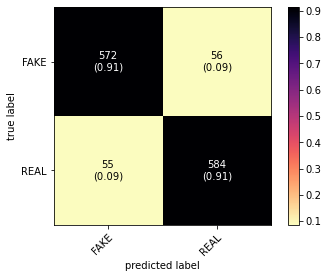

In [104]:
print("\033[1m"+'Confusion Matrix for RandomForestClassifier'+ "\033[0m")
plot_confusion_matrix(conf_mat=cm4,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'], cmap=plt.cm.magma_r)